In [1]:
import pyaudio

audio = pyaudio.PyAudio()

for i in range(audio.get_device_count()):
    device_info = audio.get_device_info_by_index(i)
    print(f"Device {i}: {device_info['name']}")

Device 0: LG ULTRAWIDE
Device 1: Scarlett 2i2 USB
Device 2: MacBook Pro Microphone
Device 3: MacBook Pro Speakers
Device 4: Iriun Webcam Audio


In [2]:
device = 1

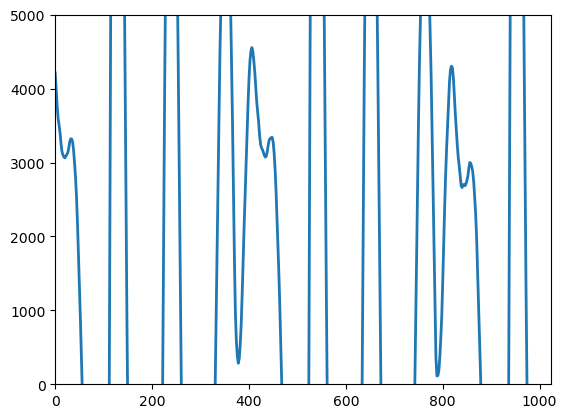

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Initialize PyAudio
pa = pyaudio.PyAudio()

# Constants
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK_SIZE = 1024

# Create a figure for plotting
fig, ax = plt.subplots()
x = np.arange(0, 2 * CHUNK_SIZE, 2)
line, = ax.plot(x, np.random.rand(CHUNK_SIZE), lw=2)
ax.set_ylim(0, 5000)
ax.set_xlim(0, CHUNK_SIZE)

# Open an audio stream
stream = pa.open(format=FORMAT,
                 channels=CHANNELS,
                 rate=RATE,
                 input=True,
                 frames_per_buffer=CHUNK_SIZE,
                 input_device_index=device)

# Function to update the plot
def update(data):
    line.set_ydata(data)
    return line,

# Function to read and display audio data
def audio_stream():
    try:
        while True:
            data = np.frombuffer(stream.read(CHUNK_SIZE), dtype=np.int16)
            yield data
    except KeyboardInterrupt:
        print("Interrupted, closing the stream...")
        stream.stop_stream()
        stream.close()
        pa.terminate()

# Create an animation
ani = FuncAnimation(fig, update, audio_stream, blit=True, interval=10, save_count=24*1000)

# Display the plot
plt.show()
